In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
noniidL10E2_path_file = "./output/mnist/acc/noniid/L10E2/"
noniidL20E5_path_file = "./output/mnist/acc/noniid/L20E5/"
iidL10E2_path_file = "./output/mnist/acc/iid/L10E2/"
iidL20E5_path_file = "./output/mnist/acc/iid/L20E5/"

fl_path_file = "./output/mnist/acc/FL/"


In [47]:
#reading files

fl_files = [
#    "FL_MLP2lr0.01_dc1.0_B10_L10_G5000_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "FL_MLP2lr0.01_dc1.0_B10_L20_G5000_partition_iid_nclient300.npy.weight.pth.acc.csv"
#    "FL_MLP2lr0.01_dc1.0_B10_L50_G5000_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
#    "FL_MLP2lr0.01_dc1.0_B10_L100_G5000_partition_noniid90_nclient300.npy.weight.pth.acc.csv"
]

iidL10E2_files = [
    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_avg10z_rnd_num_client300.part10_partition_iid_nclient300.npy.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_avg10z_rnd_num_client300.part20_partition_iid_nclient300.npy.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_avg10z_rnd_num_client300.part30_partition_iid_nclient300.npy.weight.pth.acc.csv"
]

iidL10E2_dfs = []
iidL10E2_n_files = len(iidL10E2_files)
for i in range(iidL10E2_n_files):
    iidL10E2_dfs.append(pd.read_csv(iidL10E2_path_file + iidL10E2_files[i]))

fl_dfs = []
fl_n_files = len(fl_files)
for i in range(fl_n_files):
    fl_dfs.append(pd.read_csv(fl_path_file + fl_files[i]))



In [55]:
line_color = ["#0e6787", "#ad85ab", "#f0bca5"]
#line_color1=["#db9501","#c05805","#2e2300"]
line_color1 = ['purple', 'yellow', 'green']
#line_color2 = ['red', 'blue', 'purple']
line_color2 = [ 'mediumblue', 'orangered','purple']

lbl_cluster = ["eFL_rnd: 10 servers", "eFL_rnd: 20 servers", "eFL_rnd: 30 servers"]
fl_lbl = ['FL']

fontsize = 20
ylim = [80, 97]

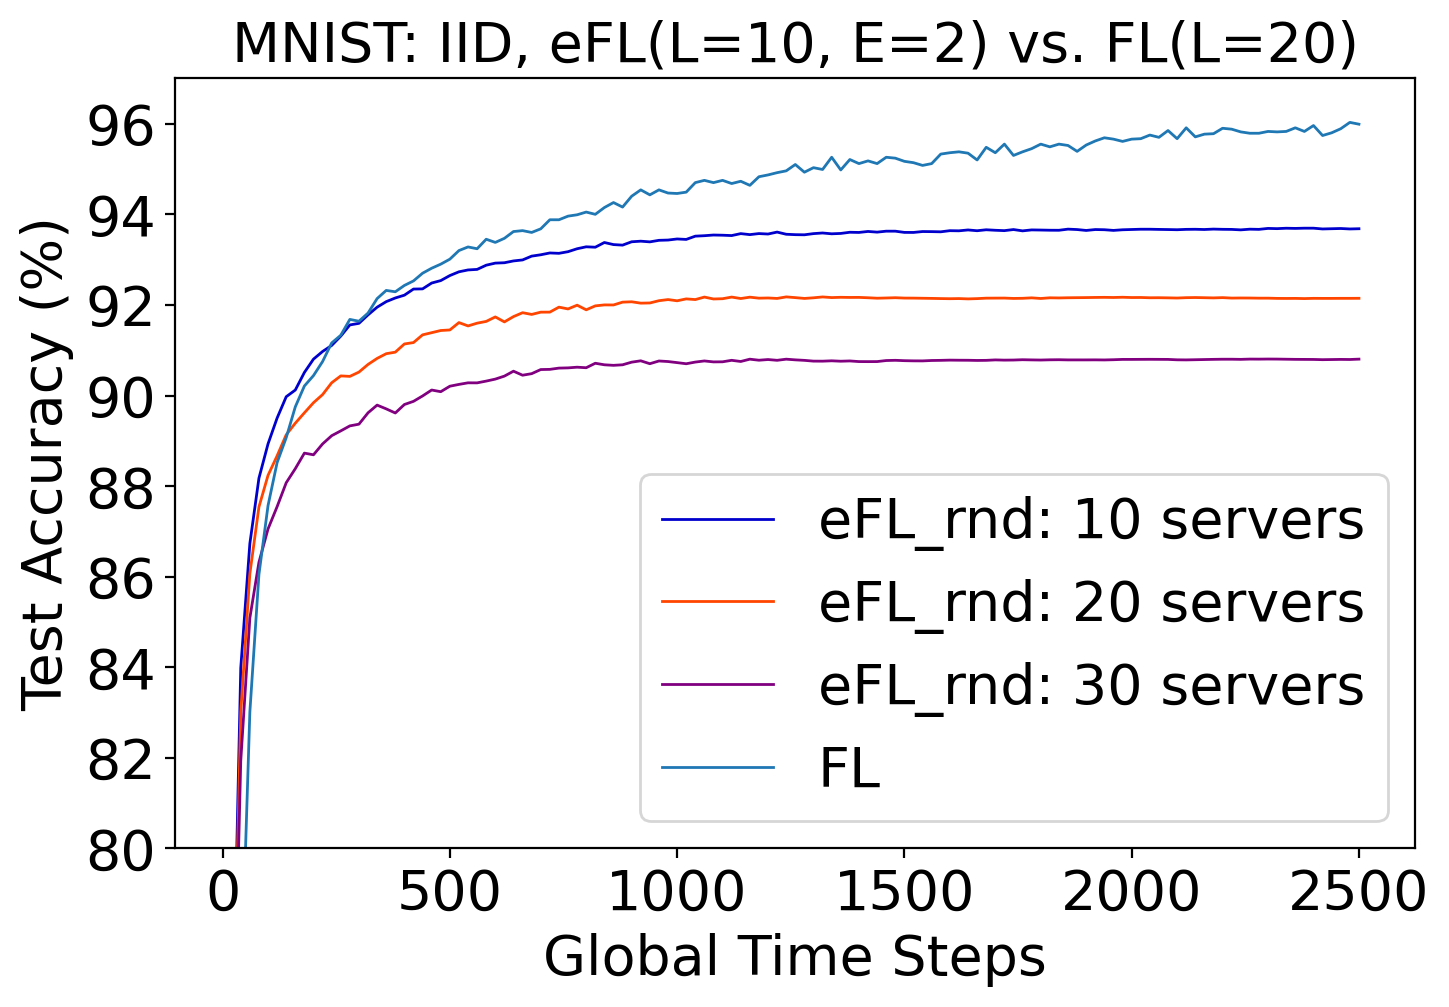

In [56]:
fig, ax = plt.subplots(figsize=(8,5))
ax.figure.set_dpi(200)

for i in range(iidL10E2_n_files):
    df = iidL10E2_dfs[i][iidL10E2_dfs[i].global_round <= 2500]
    ax.plot(df.global_round, df.test_acc, label = lbl_cluster[i], c = line_color2[i], linewidth = 1)

for i in range(fl_n_files):
    to_plot = fl_dfs[i][fl_dfs[i].global_round <= 2500] 
    ax.plot(to_plot.global_round, to_plot.test_acc, label = fl_lbl[i], linewidth=1)

ax.set_title("MNIST: IID, eFL(L=10, E=2) vs. FL(L=20)", size=fontsize)
ax.set_ylabel("Test Accuracy (%)", size=fontsize)
ax.set_xlabel("Global Time Steps", size=fontsize)
ax.set_ylim(ymin = ylim[0], ymax=ylim[1])
#ax.set_xticklabels(ax.get_xticklabels(), size = 15)
#ax.set_yticklabels(ax.get_yticklabels(), size = 15)
ax.legend(loc='best', fontsize=fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()
